<a href="https://colab.research.google.com/github/JCaballerot/Consultoria_ASEI/blob/main/EXPLORATORIO/utilities/modeling/0.exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import pandas as pd

import warnings                                  
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                  
import seaborn as sns                            

from sklearn.metrics import *


In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend",  color='red')

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.xticks(rotation=90)

# Data

In [ ]:
pddf = pd.read_csv('datos_miraflores.csv', index_col=['codmes'], parse_dates=['codmes']).fillna(0)

In [ ]:
pddf.head()

,codmes,Oferta_zona_1,Oferta_zona_2,Oferta_zona_3,Oferta_total,Venta_zona_1,Venta_zona_2,Venta_zona_3,Venta_total
0,ene-17,182,251,231,664,8.0,9,9,26
1,feb-17,178,256,340,774,4.0,13,5,22
2,mar-17,223,259,327,809,9.0,14,13,36
3,abr-17,233,252,319,804,5.0,7,8,20
4,may-17,212,269,309,790,21.0,9,10,40


# Exploratorio Oferta

### Zona 1

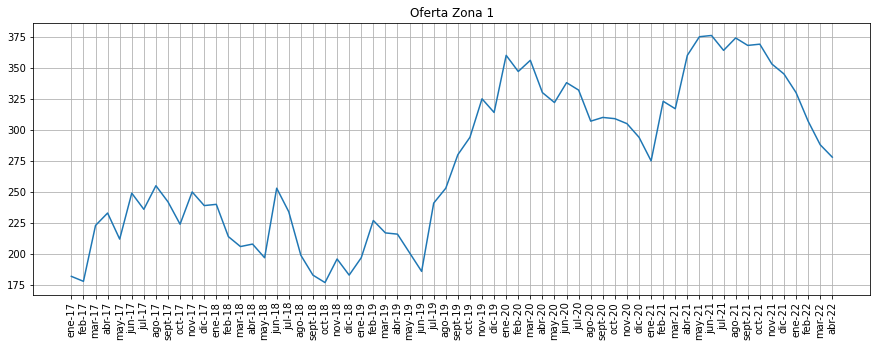

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Oferta_zona_1)
plt.xticks(rotation=90)
plt.title('Oferta Zona 1')
plt.grid(True)
plt.show()

### Zona 2

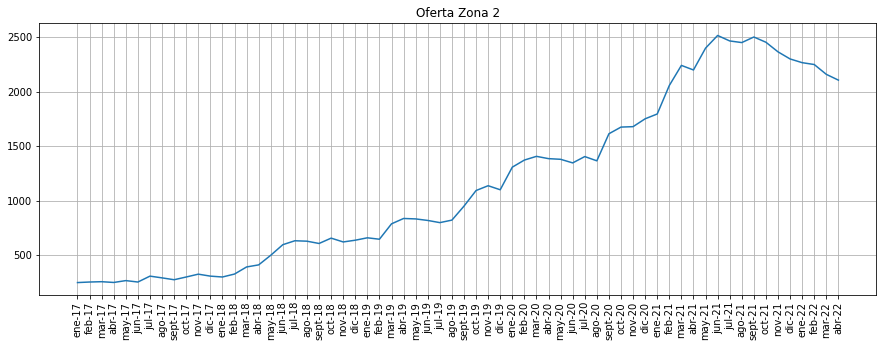

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Oferta_zona_2)
plt.xticks(rotation=90)
plt.title('Oferta Zona 2')
plt.grid(True)
plt.show()

### Zona 3

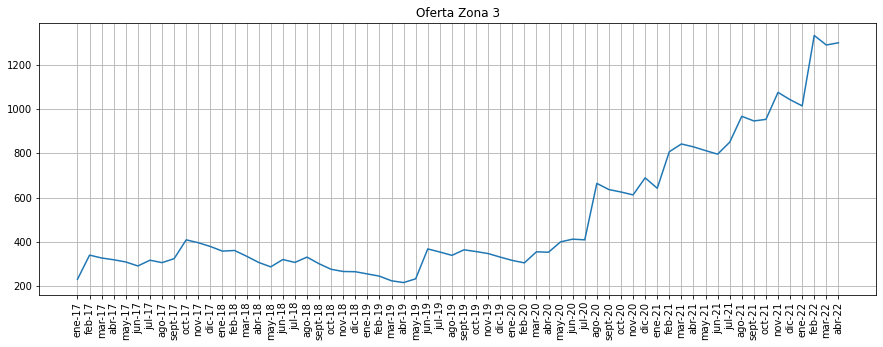

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Oferta_zona_3)
plt.xticks(rotation=90)
plt.title('Oferta Zona 3')
plt.grid(True)
plt.show()

### Total

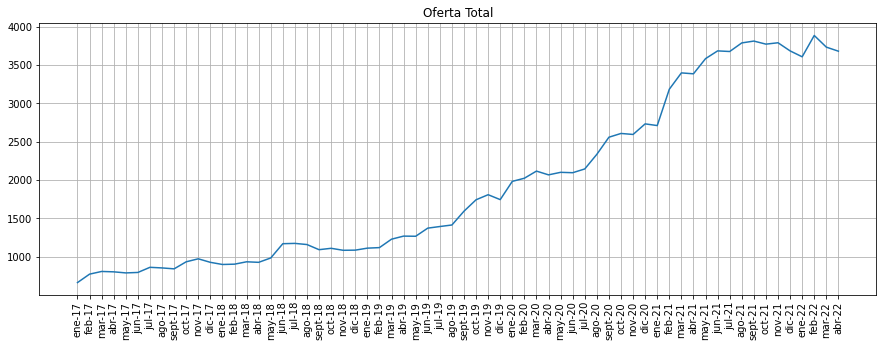

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Oferta_total)
plt.xticks(rotation=90)
plt.title('Oferta Total')
plt.grid(True)
plt.show()

In [ ]:
pddf['Oferta_total_media_movil_3'] = pddf.Oferta_total.rolling(3, min_periods = 3).mean()

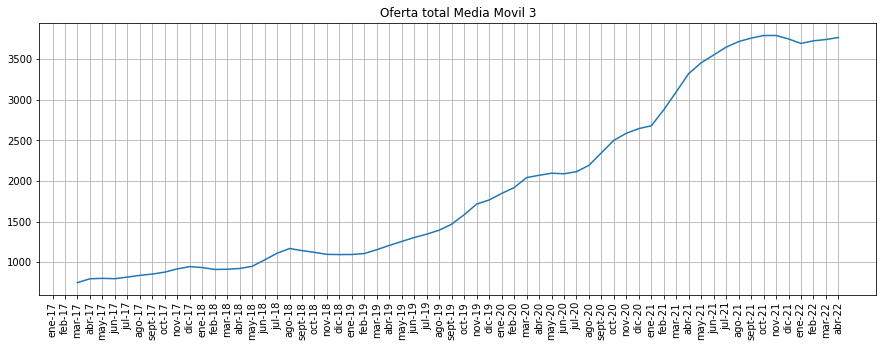

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Oferta_total_media_movil_3)
plt.xticks(rotation=90)
plt.title('Oferta total Media Movil 3')
plt.grid(True)
plt.show()

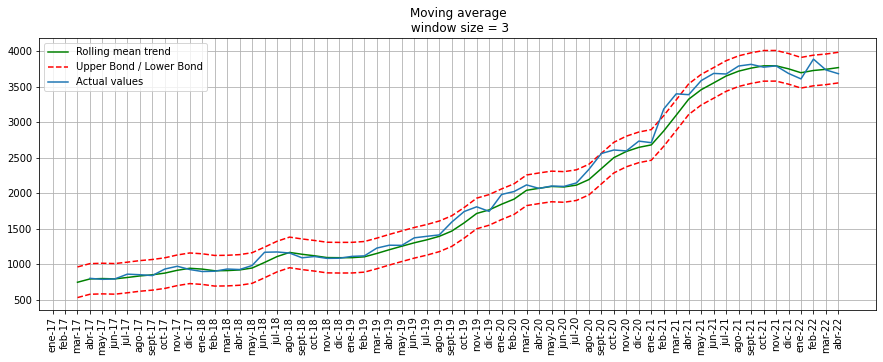

In [ ]:
plotMovingAverage(pddf['Oferta_total'], 3, plot_intervals=True, scale=1.96, plot_anomalies=False)

# Exploratorio Venta

### Zona 1

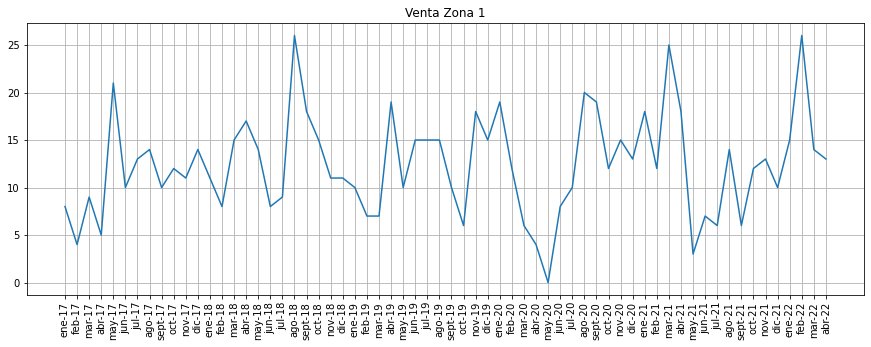

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Venta_zona_1)
plt.xticks(rotation=90)
plt.title('Venta Zona 1')
plt.grid(True)
plt.show()

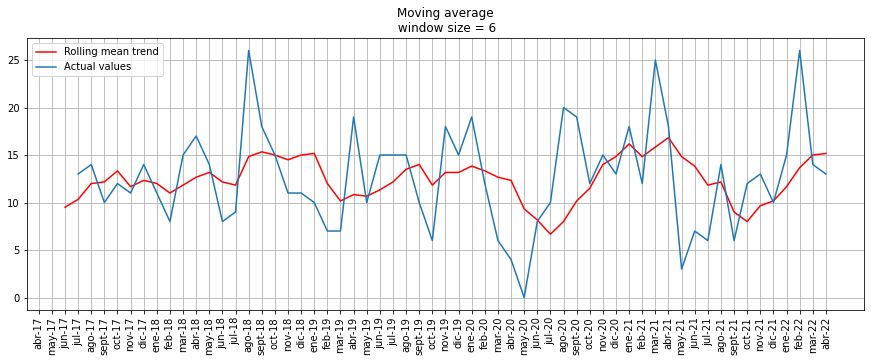

In [ ]:
plotMovingAverage(pddf['Venta_zona_1'].dropna(), 6, plot_intervals=False, scale=1.96, plot_anomalies=False)

### Zona 2

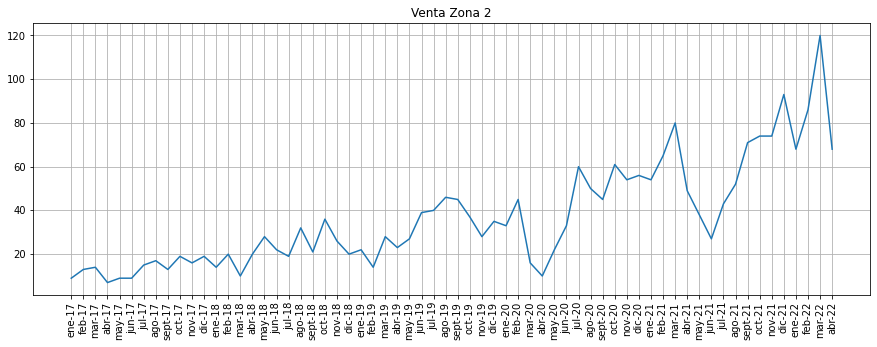

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Venta_zona_2)
plt.xticks(rotation=90)
plt.title('Venta Zona 2')
plt.grid(True)
plt.show()

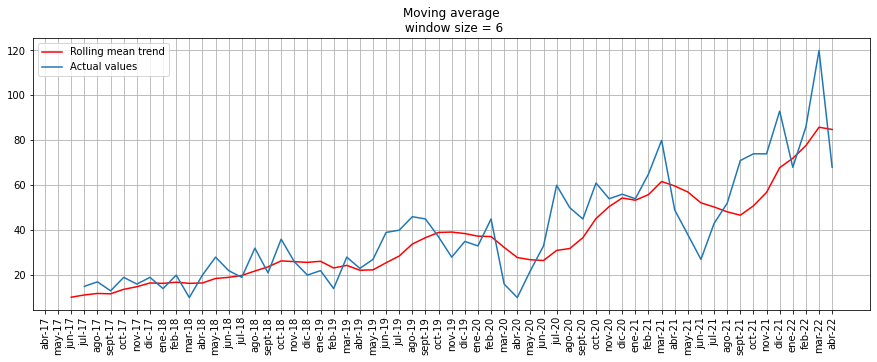

In [ ]:
plotMovingAverage(pddf['Venta_zona_2'].dropna(), 6, plot_intervals=False, scale=1.96, plot_anomalies=False)

### Zona 3

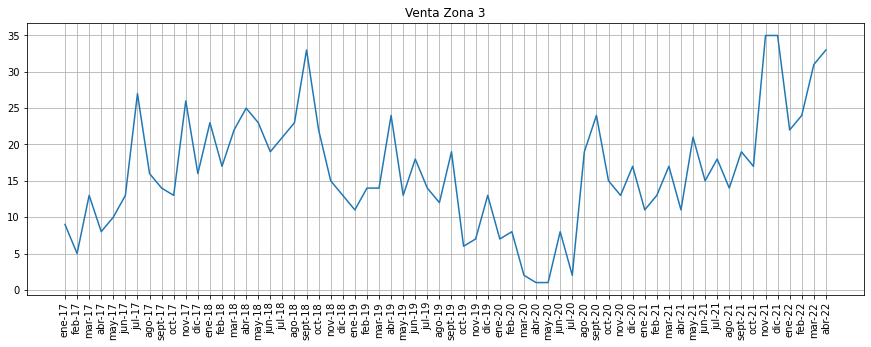

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Venta_zona_3)
plt.xticks(rotation=90)
plt.title('Venta Zona 3')
plt.grid(True)
plt.show()

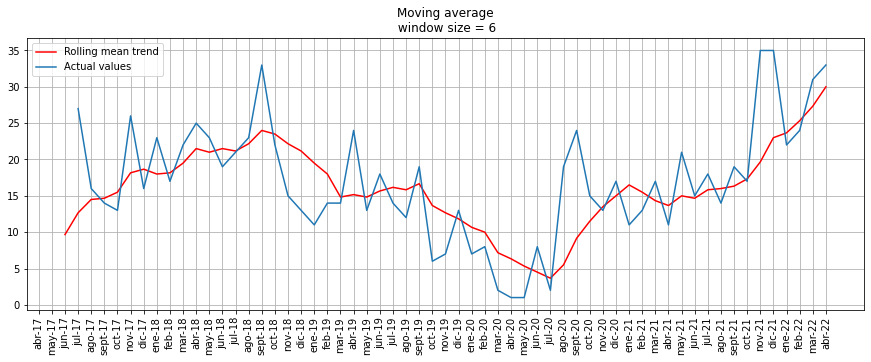

In [ ]:
plotMovingAverage(pddf['Venta_zona_3'].dropna(), 6, plot_intervals=False, scale=1.96, plot_anomalies=False)

### Total

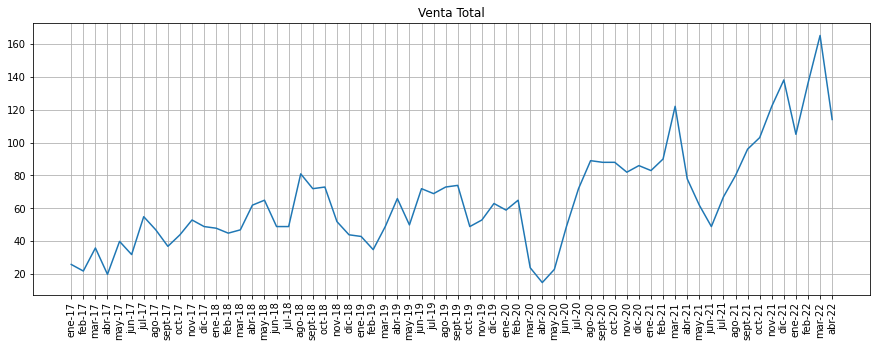

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Venta_total)
plt.xticks(rotation=90)
plt.title('Venta Total')
plt.grid(True)
plt.show()

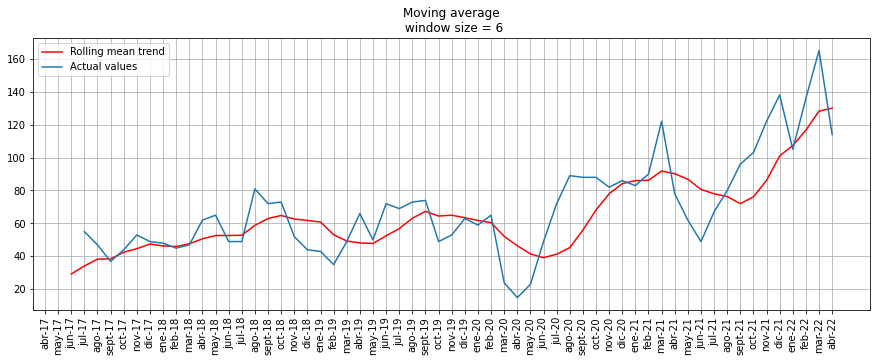

In [ ]:
plotMovingAverage(pddf['Venta_total'].dropna(), 6, plot_intervals=False, scale=1.96, plot_anomalies=False)

In [ ]:
pddf['Venta_total_media_movil_6'] = pddf.Venta_total.rolling(6, min_periods = 6).mean()

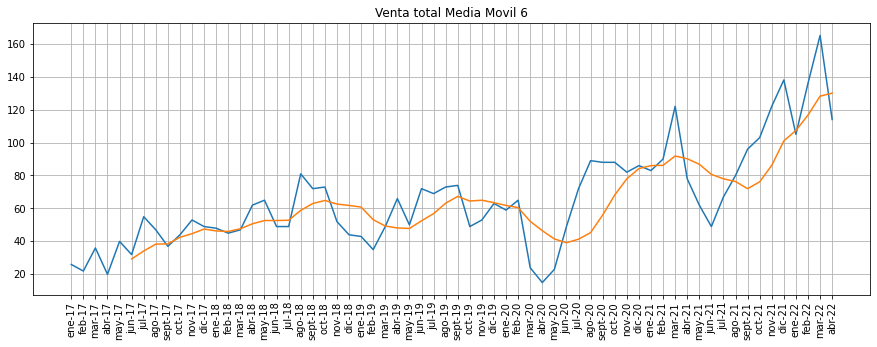

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.Venta_total)
plt.plot(pddf.Venta_total_media_movil_6)
plt.xticks(rotation=90)
plt.title('Venta total Media Movil 6')
plt.grid(True)
plt.show()

[Text(0, 0, 'ene-17'),
 Text(0, 0, 'feb-17'),
 Text(0, 0, 'mar-17'),
 Text(0, 0, 'abr-17'),
 Text(0, 0, 'may-17'),
 Text(0, 0, 'jun-17'),
 Text(0, 0, 'jul-17'),
 Text(0, 0, 'ago-17'),
 Text(0, 0, 'sept-17'),
 Text(0, 0, 'oct-17'),
 Text(0, 0, 'nov-17'),
 Text(0, 0, 'dic-17'),
 Text(0, 0, 'ene-18'),
 Text(0, 0, 'feb-18'),
 Text(0, 0, 'mar-18'),
 Text(0, 0, 'abr-18'),
 Text(0, 0, 'may-18'),
 Text(0, 0, 'jun-18'),
 Text(0, 0, 'jul-18'),
 Text(0, 0, 'ago-18'),
 Text(0, 0, 'sept-18'),
 Text(0, 0, 'oct-18'),
 Text(0, 0, 'nov-18'),
 Text(0, 0, 'dic-18'),
 Text(0, 0, 'ene-19'),
 Text(0, 0, 'feb-19'),
 Text(0, 0, 'mar-19'),
 Text(0, 0, 'abr-19'),
 Text(0, 0, 'may-19'),
 Text(0, 0, 'jun-19'),
 Text(0, 0, 'jul-19'),
 Text(0, 0, 'ago-19'),
 Text(0, 0, 'sept-19'),
 Text(0, 0, 'oct-19'),
 Text(0, 0, 'nov-19'),
 Text(0, 0, 'dic-19'),
 Text(0, 0, 'ene-20'),
 Text(0, 0, 'feb-20'),
 Text(0, 0, 'mar-20'),
 Text(0, 0, 'abr-20'),
 Text(0, 0, 'may-20'),
 Text(0, 0, 'jun-20'),
 Text(0, 0, 'jul-20'),
 Text(0,

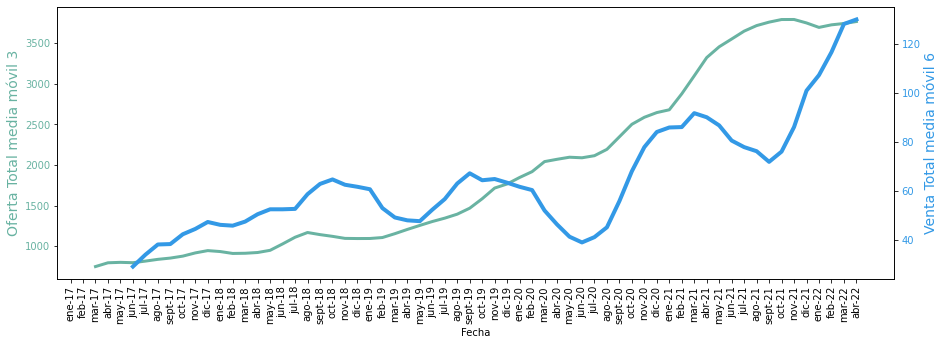

In [ ]:
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
xlabels = pddf.Oferta_total_media_movil_3.index.tolist()

ax1.plot(pddf.Oferta_total_media_movil_3, color=COLOR_TEMPERATURE, lw=3)
ax2.plot(pddf.Venta_total_media_movil_6, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Oferta Total media móvil 3", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Venta Total media móvil 6", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)


ax1.set_xticklabels(xlabels, rotation=90)

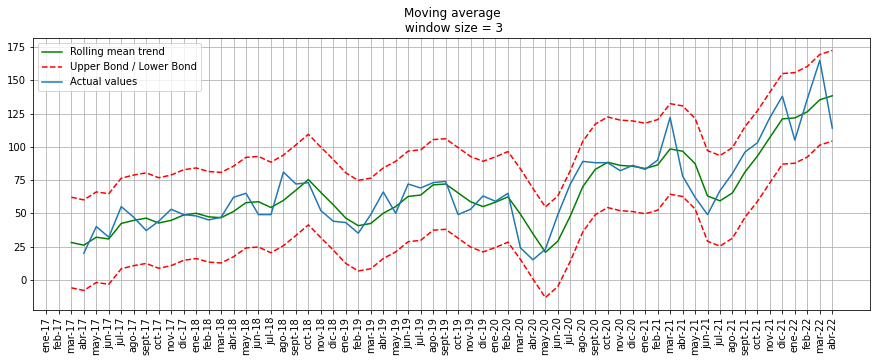

In [ ]:
plotMovingAverage(pddf['Venta_total'], 3, plot_intervals=True, scale=1.96, plot_anomalies=False)

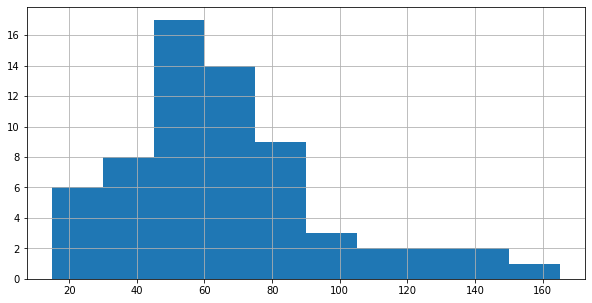

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf['Venta_total'].hist(bins=10, figsize=(10,5))
plt.show()

# Ratio de conversion

In [ ]:
for col in ['zona_1','zona_2','zona_3','total']:
  pddf['Oferta_' + col + '_a1'] = pddf['Oferta_' + col].shift(1)

In [ ]:

for col in ['zona_1','zona_2','zona_3','total']:
  pddf['ratio_conversion_' + col] = pddf['Venta_' + col]/pddf['Oferta_' + col + '_a1']


### Zona 1

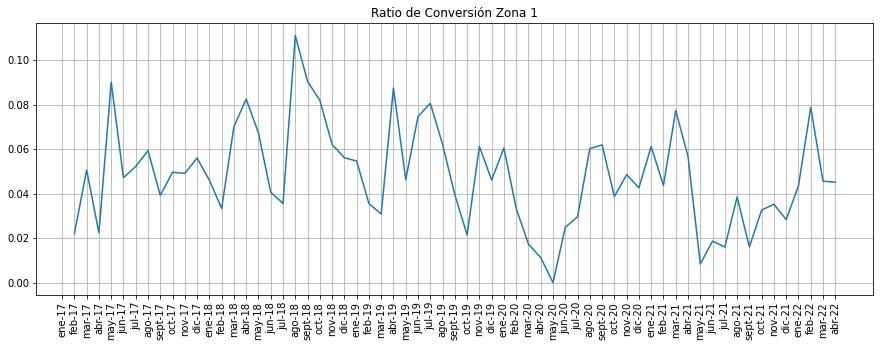

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.ratio_conversion_zona_1)
plt.xticks(rotation=90)
plt.title('Ratio de Conversión Zona 1')
plt.grid(True)
plt.show()

### Zona 2

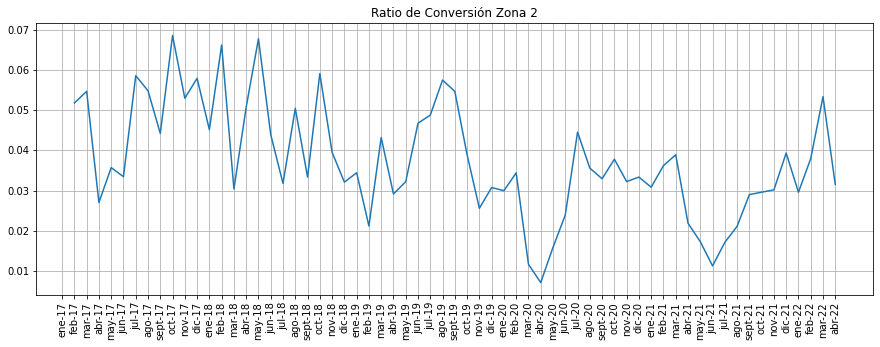

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.ratio_conversion_zona_2)
plt.xticks(rotation=90)
plt.title('Ratio de Conversión Zona 2')
plt.grid(True)
plt.show()

### Zona 3

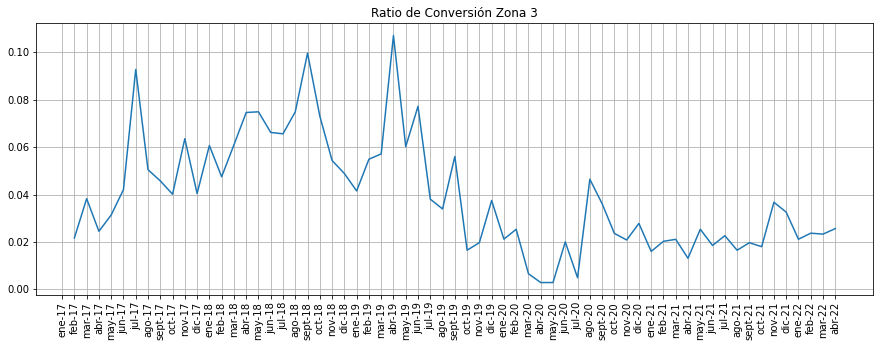

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.ratio_conversion_zona_3)
plt.xticks(rotation=90)
plt.title('Ratio de Conversión Zona 3')
plt.grid(True)
plt.show()

### Total

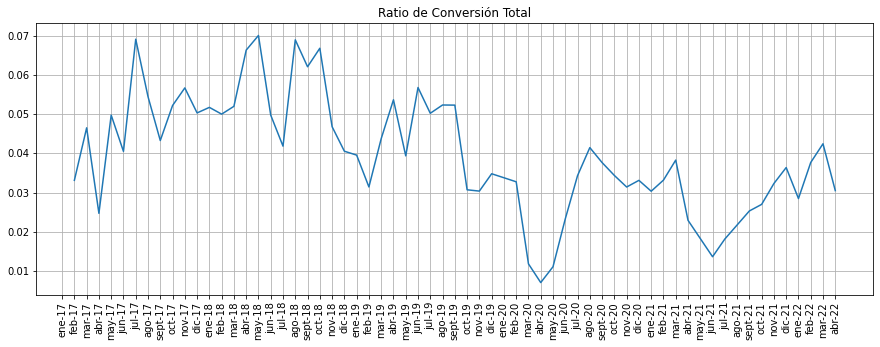

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.ratio_conversion_total)
plt.xticks(rotation=90)
plt.title('Ratio de Conversión Total')
plt.grid(True)
plt.show()

In [ ]:
pddf['ratio_conversion_total_media_movil_3'] = pddf.ratio_conversion_total.rolling(3, min_periods = 3).mean()

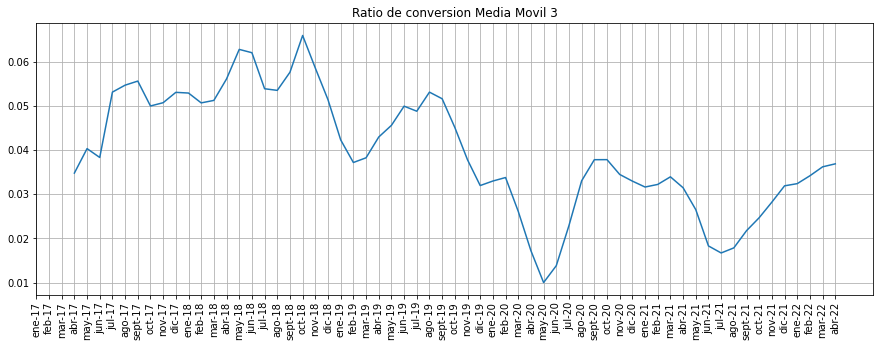

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pddf.ratio_conversion_total_media_movil_3)
plt.xticks(rotation=90)
plt.title('Ratio de conversion Media Movil 3')
plt.grid(True)
plt.show()

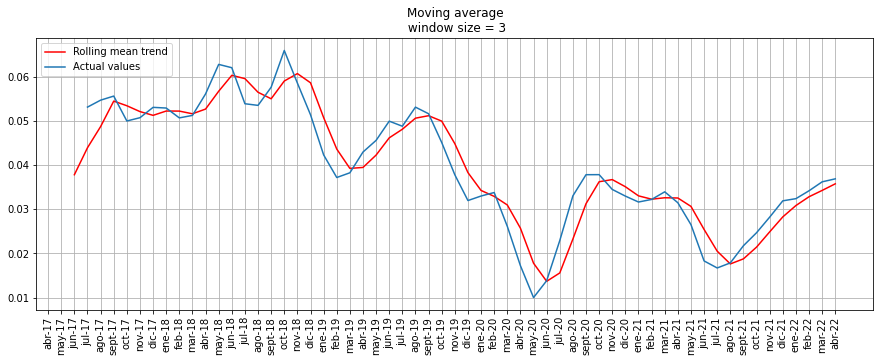

In [ ]:
plotMovingAverage(pddf['ratio_conversion_total_media_movil_3'].dropna(), 3, plot_intervals=False, scale=1.96, plot_anomalies=False)

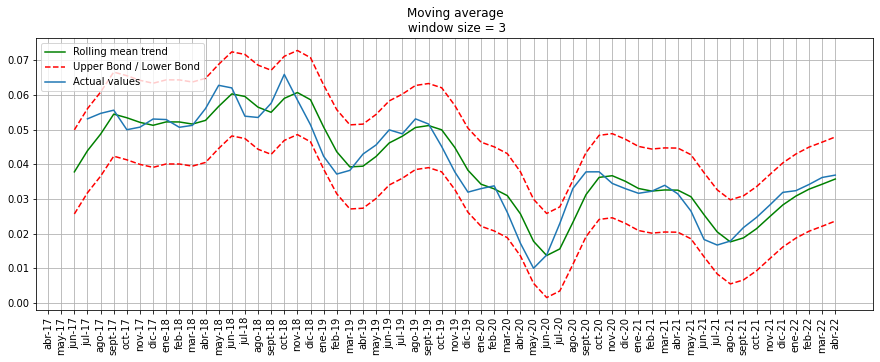

In [ ]:
plotMovingAverage(pddf['ratio_conversion_total_media_movil_3'].dropna(), 3, plot_intervals=True, scale=1.96, plot_anomalies=False)

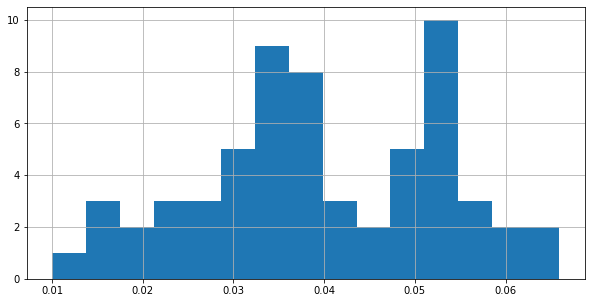

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf['ratio_conversion_total_media_movil_3'].hist(bins=15, figsize=(10,5))
plt.show()

# Correlaciones

In [ ]:
macro = pd.read_csv('macros_corregido.csv')


In [ ]:
macro.head()

,codmes,Tasas_interes_fondeo,tasa_interes_act,ind_prec_inm,ind_prec_med,ind_prec_alt,ind_prec_12_distr,ind_prec_cons_lima_met_alim_ener,prod_ener_lima,imp_bienes_cons_durarero,...,ind_coyun_cons_cement,var_porc_demanda_interna,var_porc_PBI,var_porc_PBI_const,ind_prec_inf_suby_bienes,imp_mater_const,ind_preci_import,exp_PBI,tip_camb_banc_venta,ind_tipo_camb_var_mes
0,ene-17,21.6,17.7,105.52,4833.035,6504.746721,6112.723641,85.673937,1923.560965,172.676142,...,-6.893539,0.553117,5.035927,-5.362123,0.173364,NaN,78.484838,0.040,3.341909,-1.291877
1,feb-17,21.8,17.1,105.52,4833.035,6504.746721,6112.723641,86.130716,1644.130032,174.654742,...,-4.840555,-3.592399,0.799045,-7.147955,0.196265,NaN,78.343104,0.038,3.261850,-2.408776
2,mar-17,22.1,17.0,105.52,4833.035,6504.746721,6112.723641,87.714504,1975.653286,210.989283,...,-5.849874,1.869532,1.167851,-4.071802,0.237799,NaN,78.346242,0.038,3.265478,-1.088904
3,abr-17,21.2,16.8,103.85,4793.376,6371.636744,6003.237702,87.145208,1738.640068,195.899302,...,-9.277352,0.488513,0.309612,-8.458242,0.135524,NaN,78.376843,0.039,3.248778,0.051434
4,may-17,22.8,16.8,103.85,4793.376,6371.636744,6003.237702,86.277827,1800.644194,218.666675,...,-2.030504,2.940182,3.651921,-4.023826,0.210688,NaN,78.651325,0.037,3.274545,1.300317


In [ ]:
pddf2 = pddf.reset_index().copy()
pddf2.head()

,codmes,Oferta_zona_1,Oferta_zona_2,Oferta_zona_3,Oferta_total,Venta_zona_1,Venta_zona_2,Venta_zona_3,Venta_total,Oferta_zona_1_a1,...,Oferta_zona_3_a1,Oferta_total_a1,ratio_conversion_zona_1,ratio_conversion_zona_2,ratio_conversion_zona_3,ratio_conversion_total,Oferta_total_media_movil_3,Venta_total_media_movil_3,Venta_total_media_movil_6,ratio_conversion_total_media_movil_3
0,ene-17,182,251,231,664,8.0,9,9,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,feb-17,178,256,340,774,4.0,13,5,22,182.0,...,231.0,664.0,0.021978,0.051793,0.021645,0.033133,NaN,NaN,NaN,NaN
2,mar-17,223,259,327,809,9.0,14,13,36,178.0,...,340.0,774.0,0.050562,0.054688,0.038235,0.046512,749.000000,28.0,NaN,NaN
3,abr-17,233,252,319,804,5.0,7,8,20,223.0,...,327.0,809.0,0.022422,0.027027,0.024465,0.024722,795.666667,26.0,NaN,0.034789
4,may-17,212,269,309,790,21.0,9,10,40,233.0,...,319.0,804.0,0.090129,0.035714,0.031348,0.049751,801.000000,32.0,NaN,0.040328


In [ ]:
pddf3 = pd.merge(pddf2, macro, on = 'codmes', how='left').copy()

In [ ]:
pddf3.head()

,codmes,Oferta_zona_1,Oferta_zona_2,Oferta_zona_3,Oferta_total,Venta_zona_1,Venta_zona_2,Venta_zona_3,Venta_total,Oferta_zona_1_a1,...,ind_coyun_cons_cement,var_porc_demanda_interna,var_porc_PBI,var_porc_PBI_const,ind_prec_inf_suby_bienes,imp_mater_const,ind_preci_import,exp_PBI,tip_camb_banc_venta,ind_tipo_camb_var_mes
0,ene-17,182.0,251.0,231.0,664.0,8.0,9.0,9.0,26.0,NaN,...,-6.893539,0.553117,5.035927,-5.362123,0.173364,NaN,78.484838,0.040,3.341909,-1.291877
1,feb-17,178.0,256.0,340.0,774.0,4.0,13.0,5.0,22.0,182.0,...,-4.840555,-3.592399,0.799045,-7.147955,0.196265,NaN,78.343104,0.038,3.261850,-2.408776
2,mar-17,223.0,259.0,327.0,809.0,9.0,14.0,13.0,36.0,178.0,...,-5.849874,1.869532,1.167851,-4.071802,0.237799,NaN,78.346242,0.038,3.265478,-1.088904
3,abr-17,233.0,252.0,319.0,804.0,5.0,7.0,8.0,20.0,223.0,...,-9.277352,0.488513,0.309612,-8.458242,0.135524,NaN,78.376843,0.039,3.248778,0.051434
4,may-17,212.0,269.0,309.0,790.0,21.0,9.0,10.0,40.0,233.0,...,-2.030504,2.940182,3.651921,-4.023826,0.210688,NaN,78.651325,0.037,3.274545,1.300317


In [ ]:
all_columns = list(set(pddf3.columns.tolist())-set(['codmes']))
pddf3[all_columns] = pddf3[all_columns].astype('float64')

In [ ]:

targets = ['Venta_total', 'Venta_zona_1','Venta_zona_2','Venta_zona_3', 'ratio_conversion_total', 'ratio_conversion_zona_1', 'ratio_conversion_zona_2', 'ratio_conversion_zona_3']
correlations = pd.DataFrame()
data = pddf3.copy()

for target in targets:  
  for col in list(set(data.columns.tolist())-set(['codmes', target])):
    data_temp = data[[target, col]].dropna()
    correlation = data_temp[col].corr(data_temp[target])
    temp = pd.DataFrame({'target': [target],'variable': [col], 'correlacion' : [correlation]})
    correlations = correlations.append(temp)
correlations['correlacion_abs'] = correlations.correlacion.apply(lambda x: abs(x))

correlations.sort_values(by = ['target', 'correlacion_abs'], ascending = False).to_csv('macros_importance.csv', index=0)
